In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from utils.line_utils import Line
from utils.perceptron import build_step_perceptron, __add_bias__

In [4]:
and_df = pd.DataFrame(data={
    "in_1" : [-1, -1,  1,  1],
    "in_2" : [-1,  1, -1,  1],
    "out"  : [-1, -1, -1,  1]
})

In [5]:
and_df

,in_1,in_2,out
0,-1,-1,-1
1,-1,1,-1
2,1,-1,-1
3,1,1,1


In [6]:
p, _, _ = build_step_perceptron(and_df, "out", 0.001, iters=None)

In [7]:
p.w

array([[ 0.46410098,  0.00269598, -0.46331739]])

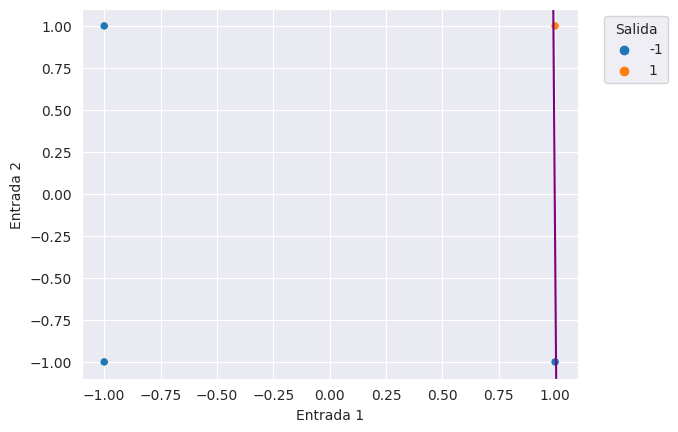

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

line_x = np.linspace(-5, 5, 20, True)
line_y = np.zeros(line_x.shape)
for i in range(line_x.shape[0]):
    line_y[i] = -(p.w[0][0]/p.w[0][1])*line_x[i] - (p.w[0][2]/p.w[0][1])
    
sns.set_style("darkgrid")
sns.scatterplot(and_df, x="in_1", y="in_2", hue="out", palette=sns.color_palette(None, 2))
plt.plot(line_x, line_y, color="purple")
plt.ylim((-1.1, 1.1))
plt.xlim((-1.1, 1.1))
plt.xlabel("Entrada 1")
plt.ylabel("Entrada 2")
plt.legend(title="Salida", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [9]:
line = Line(p.w)

In [10]:
line.distance_to(np.array([-1, -1]))

-2.0040868032570187

In [11]:
line.distance_to(np.array([1, 1]))

0.007497328049083429

In [12]:
line.distance_to(np.array([-1, 1]))

-1.992468927909353

In [13]:
line.distance_to(np.array([1, -1]))

-0.004120547298582022

In [14]:
from utils.line_utils import maximize_step_perceptron_line_margin

In [15]:
p_max, margin = maximize_step_perceptron_line_margin(and_df, "out", p, points2decide=3)

In [16]:
p_max.w

array([[-0.70710678, -0.70710678,  0.70710678]])

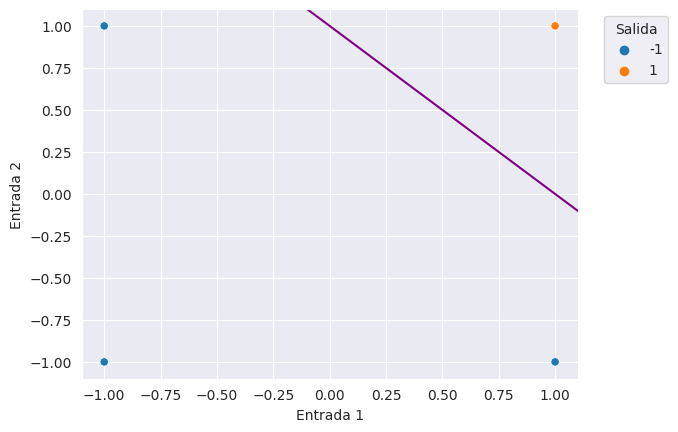

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

line_x = np.linspace(-5, 5, 20, True)
line_y = np.zeros(line_x.shape)
for i in range(line_x.shape[0]):
    line_y[i] = -(p_max.w[0][0]/p_max.w[0][1])*line_x[i] - (p_max.w[0][2]/p_max.w[0][1])
    
sns.set_style("darkgrid")
sns.scatterplot(and_df, x="in_1", y="in_2", hue="out", palette=sns.color_palette(None, 2))
plt.plot(line_x, line_y, color="purple")
plt.ylim((-1.1, 1.1))
plt.xlim((-1.1, 1.1))
plt.xlabel("Entrada 1")
plt.ylabel("Entrada 2")
plt.legend(title="Salida", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()